# 1. IMPORT LIBRARY

Pada tahap ini dilakukan import library python yang dibutuhkan untuk pengembangan proyek

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. DATA LOADING

Pada tahap ini, dataset diambil dari Google Drive.

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

kenyamanan_prediction = pd.read_csv('/content/drive/MyDrive/kenyamanan.csv')
kenyamanan_prediction.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Temperature,Humidity,Noise,Light,Oxygen,Comfort
0,20.74,23.39,45.29,434.04,20.27,3
1,26.99,31.98,60.84,100.00,20.85,1
2,24.85,66.44,46.21,332.82,20.60,4
3,19.48,62.92,46.38,429.61,20.78,3
4,22.26,27.19,43.19,494.10,20.31,4


# 3. EDA (Exploratory Data Analysis)

Pada proses ini dilakukan pengecekan terhadap data kosong (Null), dan pengecekan tipe variabel dataset.

In [25]:
kenyamanan_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2000 non-null   float64
 1   Humidity     2000 non-null   float64
 2   Noise        2000 non-null   float64
 3   Light        2000 non-null   float64
 4   Oxygen       2000 non-null   float64
 5   Comfort      2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


In [26]:
kenyamanan_prediction.describe()

,Temperature,Humidity,Noise,Light,Oxygen,Comfort
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,23.95727,50.653900,50.264145,400.784495,20.398405,3.14800
std,2.91429,14.572529,9.784986,146.976840,0.562210,0.99176
min,16.00000,20.000000,30.000000,100.000000,18.180000,1.00000
25%,21.99000,40.597500,43.055000,299.837500,20.010000,2.00000
50%,23.97500,50.460000,50.440000,400.730000,20.490000,3.00000
75%,25.98250,60.195000,57.182500,500.410000,20.990000,4.00000
max,32.00000,90.000000,80.380000,896.760000,21.000000,5.00000


In [27]:
kenyamanan_prediction.isnull().sum()

,0
Temperature,0
Humidity,0
Noise,0
Light,0
Oxygen,0
Comfort,0


In [28]:
(kenyamanan_prediction == 0).sum()

,0
Temperature,0
Humidity,0
Noise,0
Light,0
Oxygen,0
Comfort,0


In [29]:
kenyamanan_prediction.describe()

,Temperature,Humidity,Noise,Light,Oxygen,Comfort
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,23.95727,50.653900,50.264145,400.784495,20.398405,3.14800
std,2.91429,14.572529,9.784986,146.976840,0.562210,0.99176
min,16.00000,20.000000,30.000000,100.000000,18.180000,1.00000
25%,21.99000,40.597500,43.055000,299.837500,20.010000,2.00000
50%,23.97500,50.460000,50.440000,400.730000,20.490000,3.00000
75%,25.98250,60.195000,57.182500,500.410000,20.990000,4.00000
max,32.00000,90.000000,80.380000,896.760000,21.000000,5.00000


# 4. VISUALISASI DATA

Pengecekan outliers untuk menangani data yang jauh dari data utama sehingga tidak membuat noise saat dilakukan training model.

<Axes: xlabel='Comfort'>

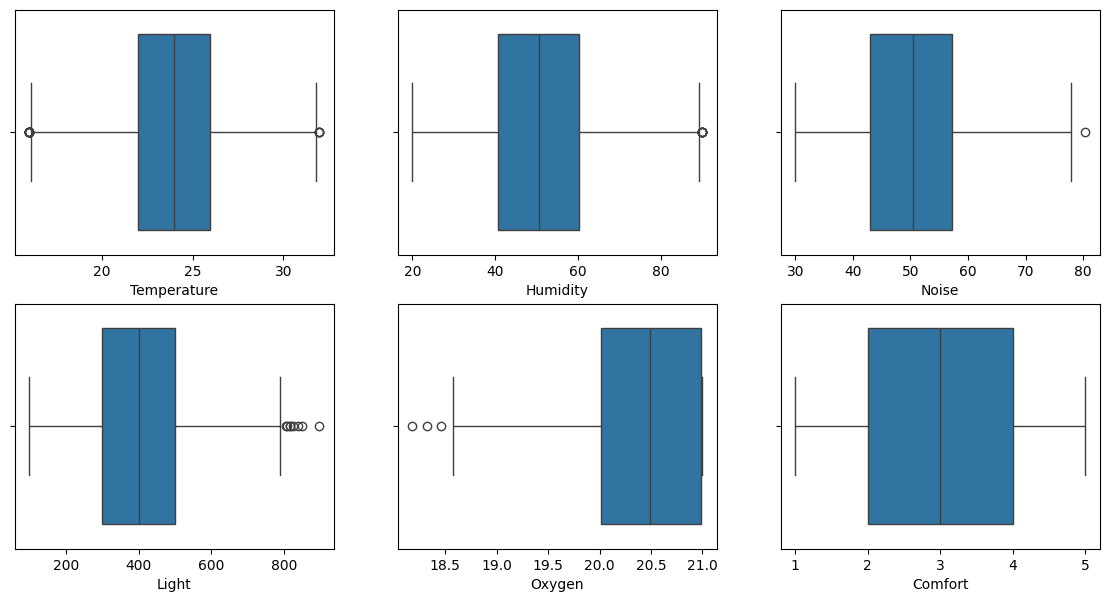

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=kenyamanan_prediction.Temperature)
sns.boxplot(ax=axes[0, 1], x=kenyamanan_prediction.Humidity)
sns.boxplot(ax=axes[0, 2], x=kenyamanan_prediction.Noise)

sns.boxplot(ax=axes[1, 0], x=kenyamanan_prediction.Light)
sns.boxplot(ax=axes[1, 1], x=kenyamanan_prediction.Oxygen)
sns.boxplot(ax=axes[1, 2], x=kenyamanan_prediction.Comfort)

IQR

In [31]:
Q1 = kenyamanan_prediction.quantile(0.25)
Q3 = kenyamanan_prediction.quantile(0.75)
IQR = Q3 - Q1
kenyamanan_prediction = kenyamanan_prediction[~((kenyamanan_prediction < (Q1 - 1.5 * IQR)) | (kenyamanan_prediction > (Q3 + 1.5 * IQR))).any(axis=1)]
kenyamanan_prediction

,Temperature,Humidity,Noise,Light,Oxygen,Comfort
0,20.74,23.39,45.29,434.04,20.27,3
1,26.99,31.98,60.84,100.00,20.85,1
2,24.85,66.44,46.21,332.82,20.60,4
3,19.48,62.92,46.38,429.61,20.78,3
4,22.26,27.19,43.19,494.10,20.31,4
...,...,...,...,...,...,...
1995,26.54,36.38,49.78,513.78,20.08,3
1996,20.64,22.73,67.10,487.37,19.52,2
1997,22.92,48.16,63.25,158.94,20.17,3
1998,19.17,76.92,45.49,341.39,20.91,3


Menggunakan metode IQR untuk menormalisasikan dan membersihkan outliers sebelum disiapkan untuk menjadi model machine learning.

<Axes: xlabel='Comfort'>

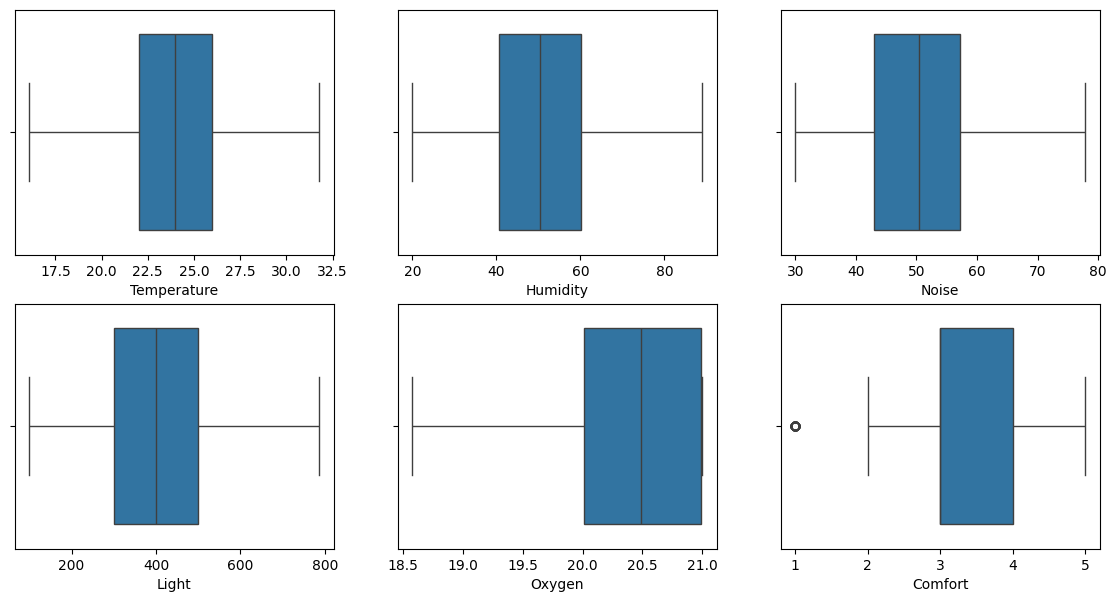

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=kenyamanan_prediction.Temperature)
sns.boxplot(ax=axes[0, 1], x=kenyamanan_prediction.Humidity)
sns.boxplot(ax=axes[0, 2], x=kenyamanan_prediction.Noise)

sns.boxplot(ax=axes[1, 0], x=kenyamanan_prediction.Light)
sns.boxplot(ax=axes[1, 1], x=kenyamanan_prediction.Oxygen)
sns.boxplot(ax=axes[1, 2], x=kenyamanan_prediction.Comfort)

### Univariate Analysis (Numerical Features)

Univariate: Histogram, boxplot, dan deskripsi statistik digunakan untuk menganalisis distribusi masing-masing variabel.

<function matplotlib.pyplot.show(close=None, block=None)>

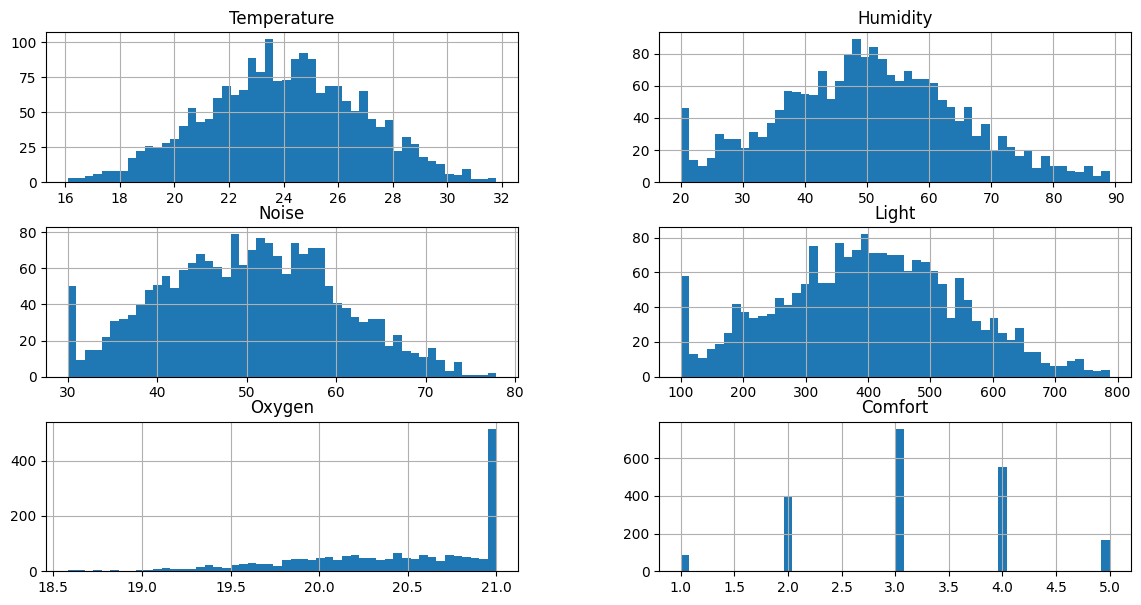

In [33]:
kenyamanan_prediction.hist(bins = 50, figsize=(14, 7))
plt.show

### Multivariate Analysis

Multivariate: Korelasi dan scatterplot digunakan untuk melihat hubungan antar fitur dengan target (Comfort).

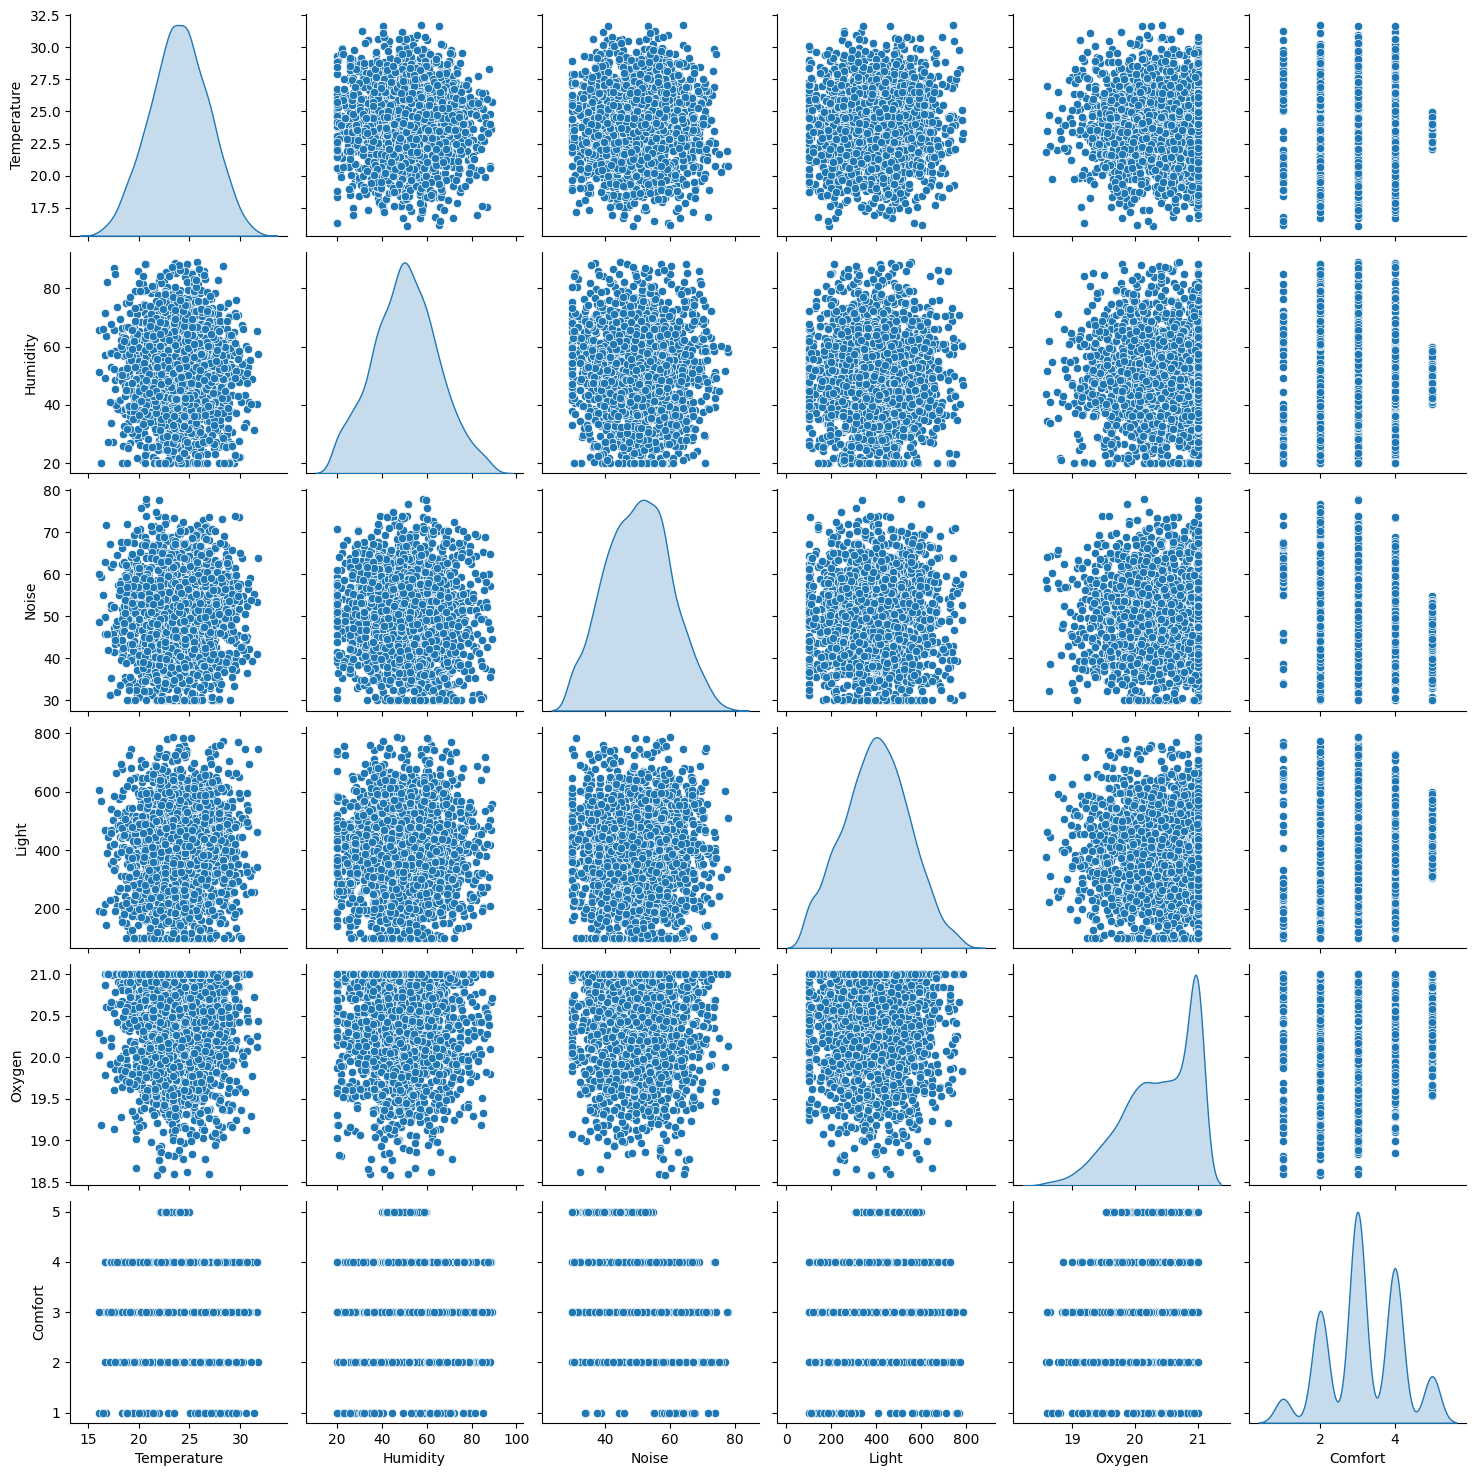

In [34]:
sns.pairplot(kenyamanan_prediction, diag_kind='kde')

Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

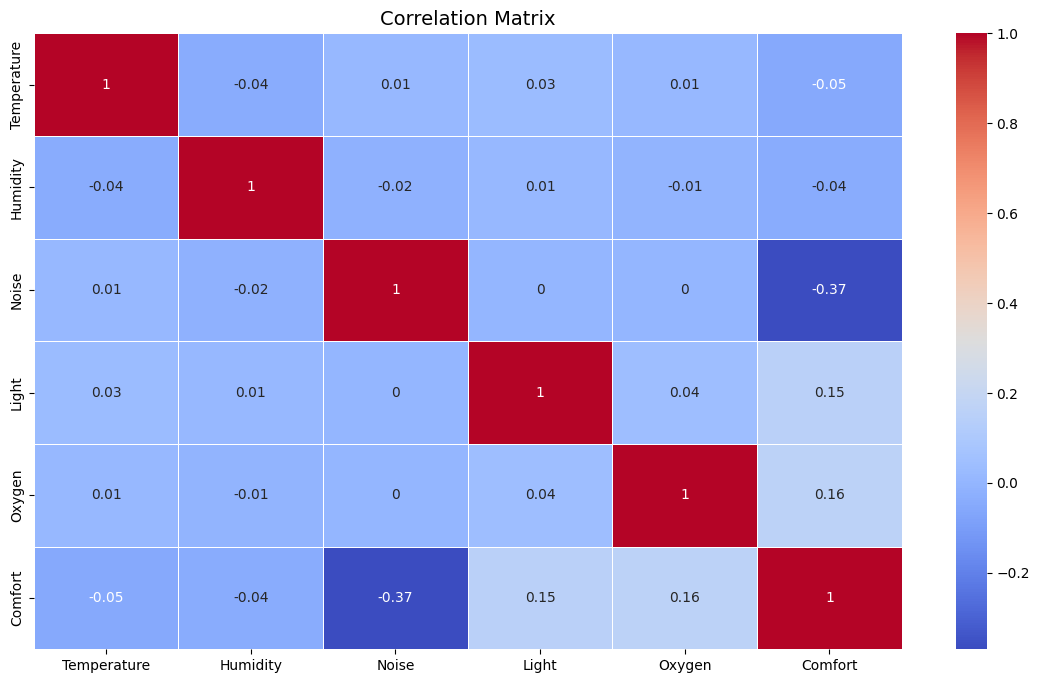

In [35]:
plt.figure(figsize=(14, 8))
correlation_matrix = kenyamanan_prediction.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', size = 14)


- Temperature dan Humidity memiliki korelasi negatif sedang (-0.57), menunjukkan bahwa ketika suhu naik, kelembaban cenderung menurun.

- Oxygen memiliki korelasi positif moderat terhadap Comfort (0.44), mengindikasikan kadar oksigen tinggi mungkin meningkatkan kenyamanan kerja.

- Noise dan Light memiliki korelasi rendah terhadap Comfort, kemungkinan kontribusinya kecil secara langsung terhadap skor kenyamanan.

- Korelasi antar fitur lainnya relatif rendah, sehingga multikolinearitas tidak menjadi isu besar dalam pemodelan.

# 5. DATA PREPARATION

Pada tahap ini mempersiapkan data yang akan digunakan untuk Model Development, dengan pembagian 80% untuk pelatihan (Training) dan 20% untuk pengujian (Testing)

In [36]:
from sklearn.model_selection import train_test_split
X = kenyamanan_prediction.drop('Comfort', axis=1)
y = kenyamanan_prediction['Comfort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(f'Total seluruh sampel dalam dataset: {len(X)}')
print(f'Total sampel dalam train dataset: {len(X_train)}')
print(f'Total samepl dalam test dataset: {len(X_test)}')

Total seluruh sampel dalam dataset: 1967
Total sampel dalam train dataset: 1573
Total samepl dalam test dataset: 394


Standarisasi

In [38]:
numerical_features = ['Temperature', 'Humidity', 'Noise', 'Light', 'Oxygen']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train[numerical_features].head()

,Temperature,Humidity,Noise,Light,Oxygen
772,0.072480,-0.857914,-0.380308,-1.487897,0.139375
757,1.048083,-0.707440,1.601758,-0.443640,0.671718
1307,-1.262370,-0.007775,-0.335848,-1.481224,-0.747864
876,0.111223,-0.719229,-1.069947,-0.963154,0.600739
1224,0.664182,2.142535,1.053769,-0.692115,-0.659140


# 6. MODEL DEVELOPMENT

### KNN

Data dilatih dengan model pertama yaitu `KNN (K-Nearest Neighbors)` dengan nilai k tetangga terdekat adalah 5.

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.616751269035533
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.58      0.45      0.51        80
           3       0.66      0.64      0.65       166
           4       0.59      0.70      0.64       103
           5       0.64      0.74      0.68        34

    accuracy                           0.62       394
   macro avg       0.57      0.56      0.56       394
weighted avg       0.61      0.62      0.61       394



### Gradient Boosting

Setelah itu, model dilatih menggunakan `Gradient Boosting` dengan jumlah pohon keputusan yang dibangun adalah 100.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9238578680203046
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.36      0.47        11
           2       0.90      0.86      0.88        80
           3       0.92      0.96      0.94       166
           4       0.94      0.95      0.95       103
           5       1.00      0.97      0.99        34

    accuracy                           0.92       394
   macro avg       0.88      0.82      0.84       394
weighted avg       0.92      0.92      0.92       394



### RF

Model selanjutnya dilatih menggunakan metode `Random Forest` dengan menentukan nilai `n_estimators` adalah 100 yang menggabungkan banyak pohon untuk meningkatkan akurasi.

In [41]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9517766497461929
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.55      0.67        11
           2       0.91      0.88      0.89        80
           3       0.95      0.98      0.96       166
           4       0.98      1.00      0.99       103
           5       1.00      1.00      1.00        34

    accuracy                           0.95       394
   macro avg       0.94      0.88      0.90       394
weighted avg       0.95      0.95      0.95       394



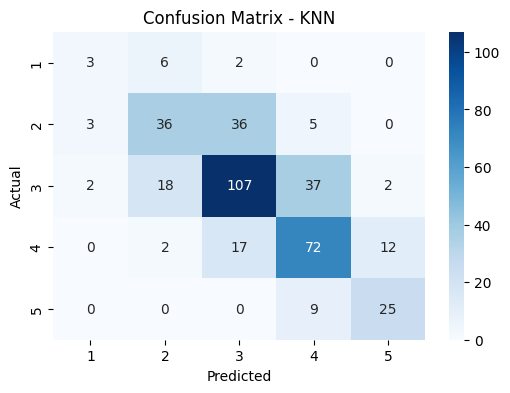

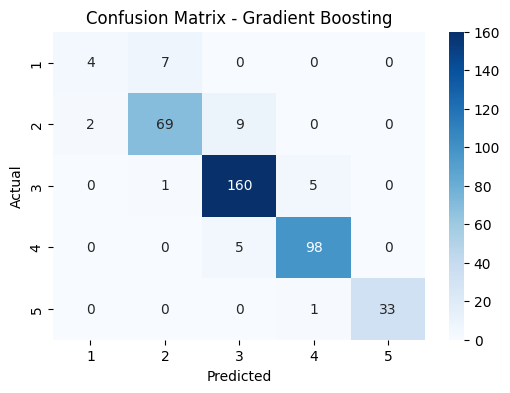

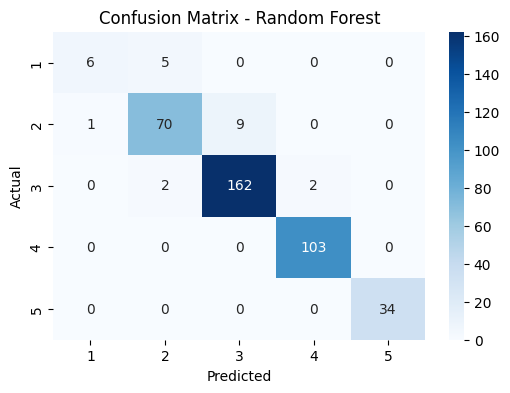

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 7. EVALUASI MODEL

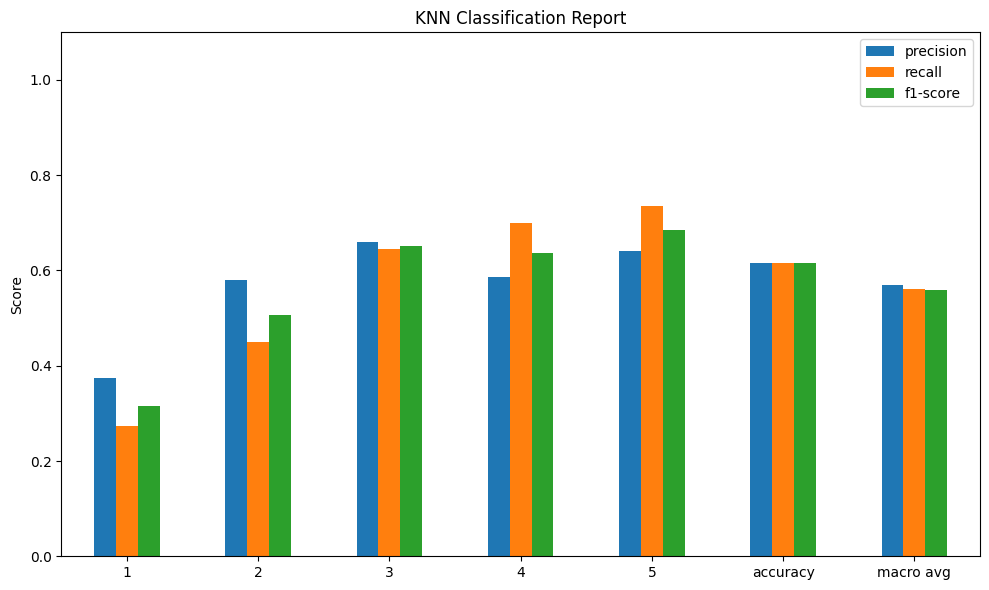

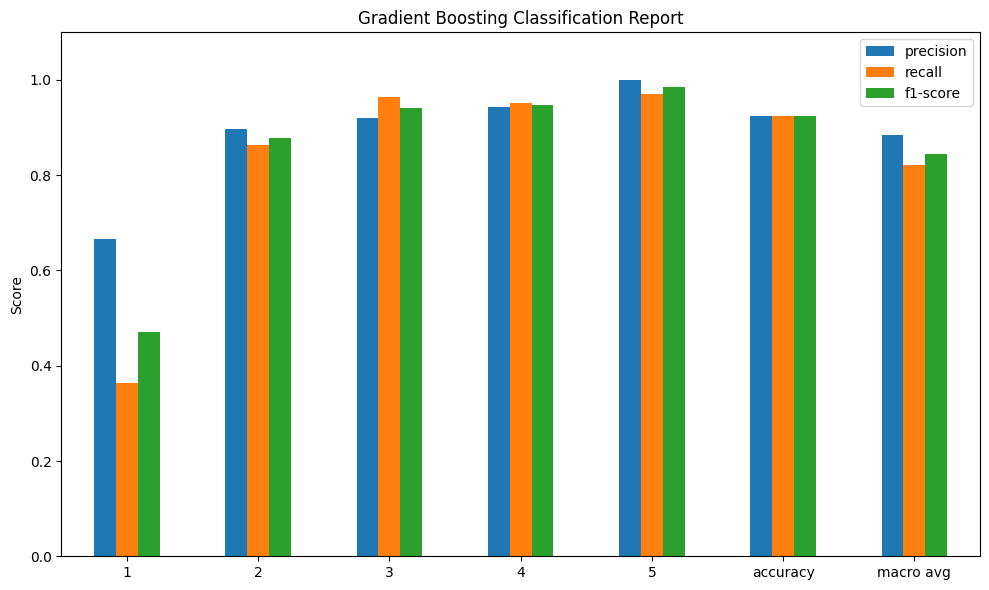

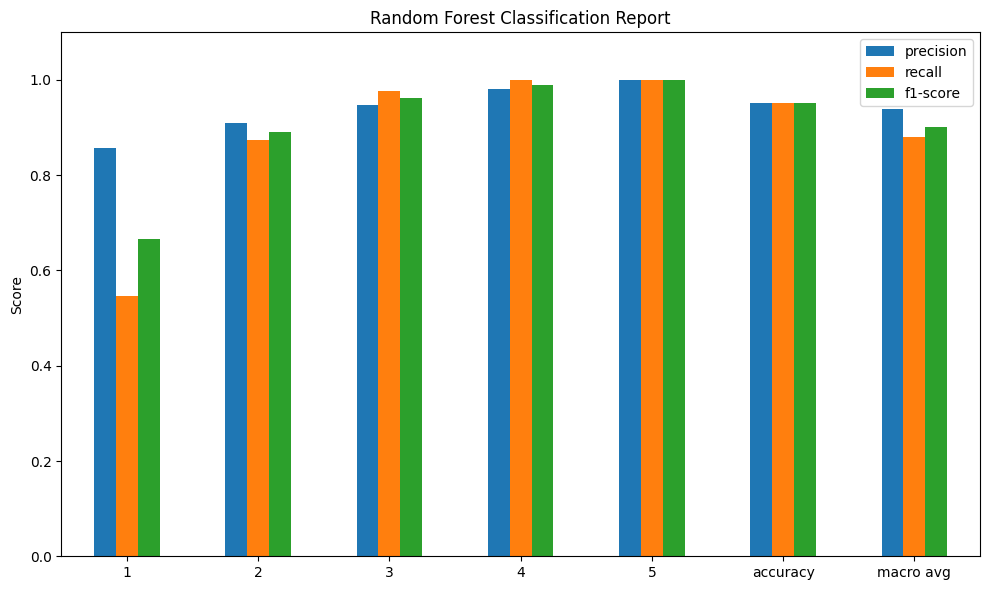

In [43]:
def plot_classification_report(report, title):
    report_dict = classification_report(report[0], report[1], output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    df = df.iloc[:-1, :-1]
    df = df.astype(float)
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim([0.0, 1.1])
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

knn_report_data = (y_test, y_pred_knn)
svm_report_data = (y_test, y_pred_gb)
rf_report_data = (y_test, y_pred_rf)

plot_classification_report(knn_report_data, 'KNN Classification Report')
plot_classification_report(svm_report_data, 'Gradient Boosting Classification Report')
plot_classification_report(rf_report_data, 'Random Forest Classification Report')


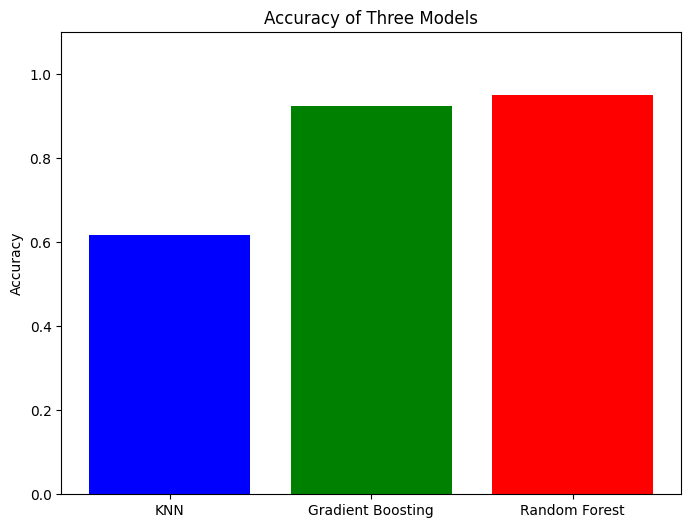

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
model_names = ['KNN', 'Gradient Boosting', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Three Models')
plt.ylim([0.0, 1.1])
plt.show()

Berdasarkan hasil training, didapat metode pelatihan model `Random Forest` memiliki accuracy score tertinggi yaitu `95,17%` sehingga model dari `Random Forest` akan dipilih sebagai sistem prediksi kenyamanan.